## HAMOYE QUIZ 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv ("household_power_consumption.txt", sep=";",
                    header=0, low_memory=False, infer_datetime_format=True, 
                    parse_dates={"datetime":[0,1]},index_col=["datetime"])

In [3]:
df.replace("?", np.nan, inplace = True)
df = df.astype('float32')
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [4]:
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


In [6]:
#daily rDownsample 
df_daily = df.resample('D').sum()
df_daily.head(3)
df_daily.isna().sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<Figure size 1080x576 with 0 Axes>

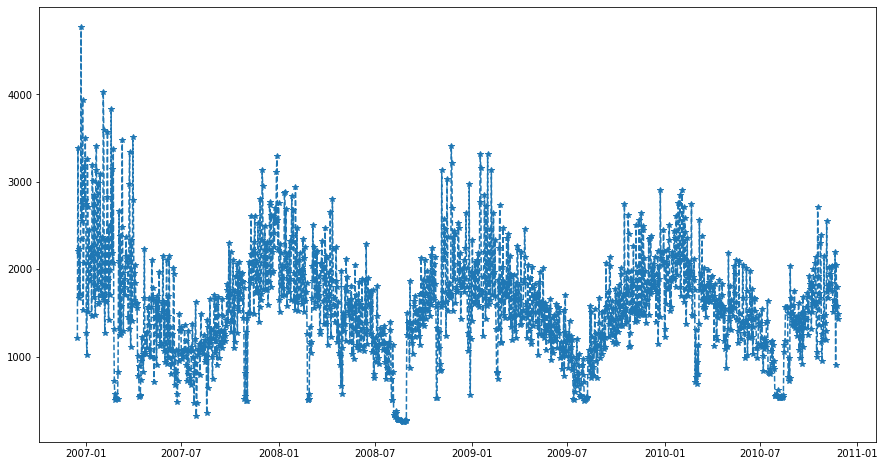

In [9]:
plt.figure(figsize=(15,8))
plt.plot(df_daily.index, df_daily.Global_active_power, '--', marker='*')
plt.show()

C:\Users\miky\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


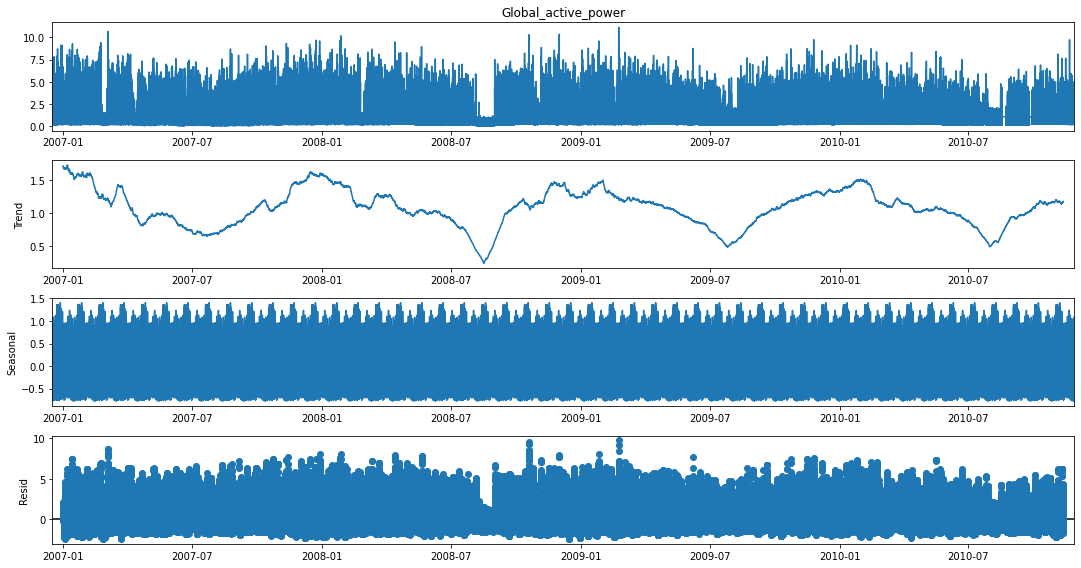

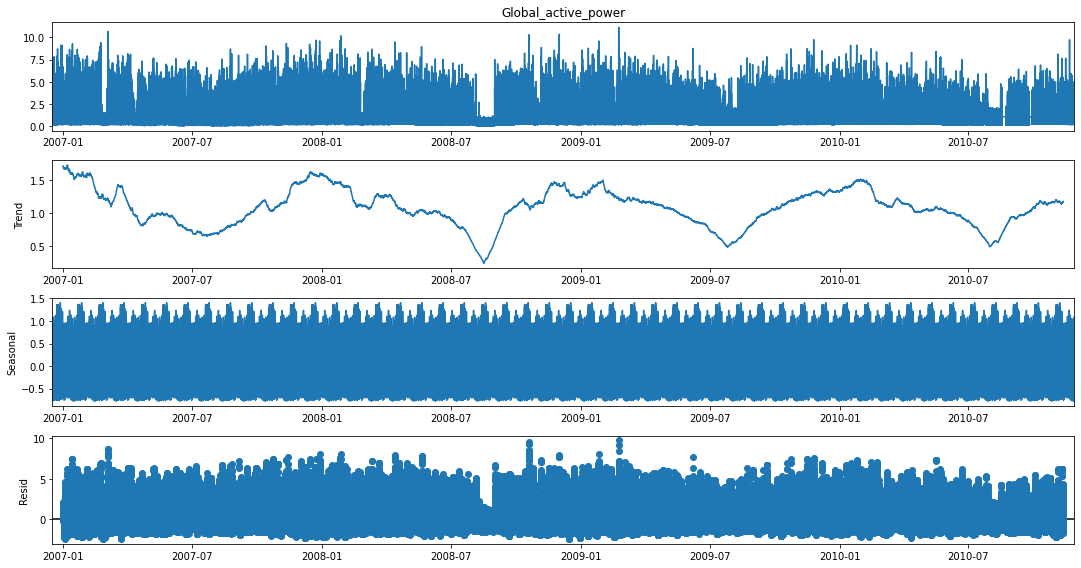

In [10]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8

decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], freq = 60 * 24* 30, model='additive')
decompose_series.plot()
plt.show()

In [11]:
dff = df_daily.reset_index()
from scipy.stats import pearsonr

corr, p = pearsonr(dff.Global_active_power, dff.Global_reactive_power)

In [12]:
corr

0.04109788470945896

In [40]:
corr4, p = pearsonr(df.Global_active_power, df.Global_reactive_power)
corr4

0.24701705251195594

In [17]:
corr2,_ = pearsonr(dff.Voltage, dff.Global_intensity)
corr2

0.05221350712869457

In [39]:
corr3,_ = pearsonr(df.Voltage, df.Global_intensity)
corr3

-0.4097846327279233

In [18]:
data = dff[['datetime', 'Global_active_power']]
data = data.rename(columns={'datetime': 'ds',
                        'Global_active_power': 'y'})

data.head(3)

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928


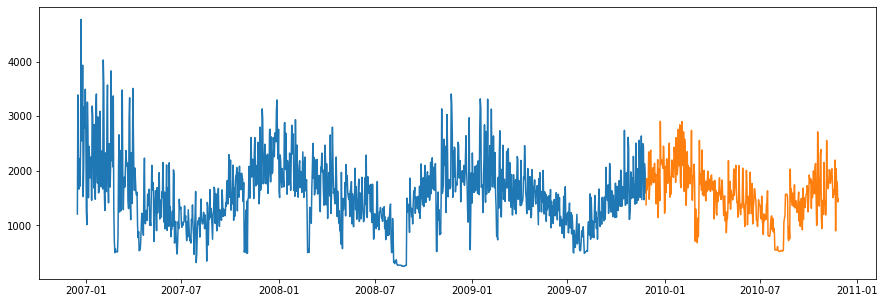

In [19]:
#Dividing the dataset into test and train based on the instruction
n_tests = 365
df_train = data[:-n_tests]
df_test = data[-n_tests:]

# visualization
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['ds'], df_train['y'])
ax.plot(df_test['ds'], df_test['y'])

## Univariate Model

In [20]:
from fbprophet import Prophet

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
C:\Users\miky\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [21]:
forecast = model.predict(df_test)
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2010-11-22,1279.242051,1486.404749,2595.312959,1268.259045,1291.071753,757.435081,757.435081,757.435081,350.126165,...,-161.289298,-161.289298,-161.289298,568.598214,568.598214,568.598214,0.0,0.0,0.0,2036.677132
361,2010-11-23,1279.370219,1644.069268,2749.419335,1268.337262,1291.244561,899.456819,899.456819,899.456819,350.126165,...,-29.336902,-29.336902,-29.336902,578.667556,578.667556,578.667556,0.0,0.0,0.0,2178.827038
362,2010-11-24,1279.498388,1606.300034,2769.279631,1268.418048,1291.417369,910.364209,910.364209,910.364209,350.126165,...,-24.719953,-24.719953,-24.719953,584.957997,584.957997,584.957997,0.0,0.0,0.0,2189.862597
363,2010-11-25,1279.626556,1483.605065,2564.412489,1268.526052,1291.609890,742.886375,742.886375,742.886375,350.126165,...,-194.901468,-194.901468,-194.901468,587.661679,587.661679,587.661679,0.0,0.0,0.0,2022.512932
364,2010-11-26,1279.754725,1568.797075,2710.188575,1268.620503,1291.808873,873.048934,873.048934,873.048934,350.126165,...,-64.129799,-64.129799,-64.129799,587.052568,587.052568,587.052568,0.0,0.0,0.0,2152.803659


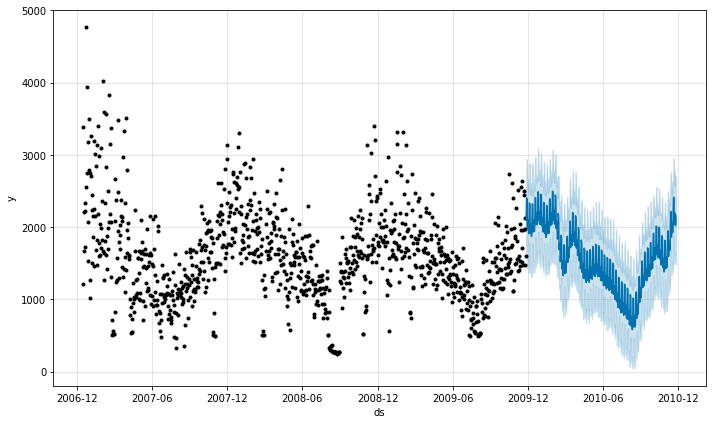

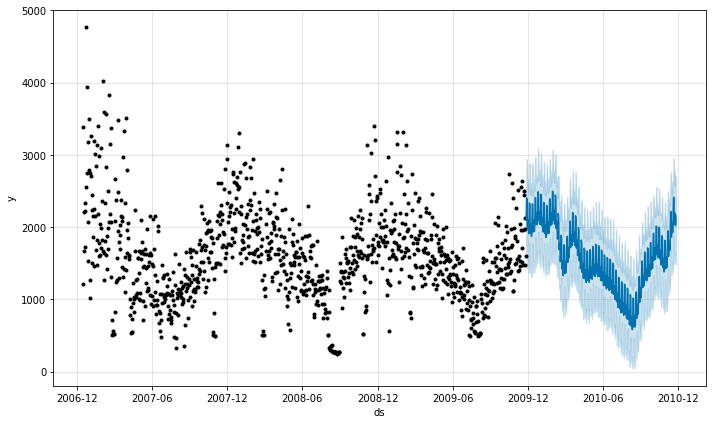

In [22]:
model.plot(forecast)

In [27]:
#MAPE Computation

y_true = np.array(df_test['y'])
y_forecast = np.array(forecast['yhat'])
mape = np.mean(np.abs((y_true - y_forecast) / y_true)) * 100
print('The MAPE is ', round(mape, 2))

The MAPE is  20.88


In [24]:
metric_df = forecast.set_index('ds')[['yhat']].join(df_test.set_index('ds').y).reset_index()

In [28]:
import ml_metrics as metrics
#RMSE Computation

rmse_1 = metrics.rmse(metric_df.y, metric_df.yhat)
print('The RMSE is', round (rmse_1, 2))

The RMSE is 374.97


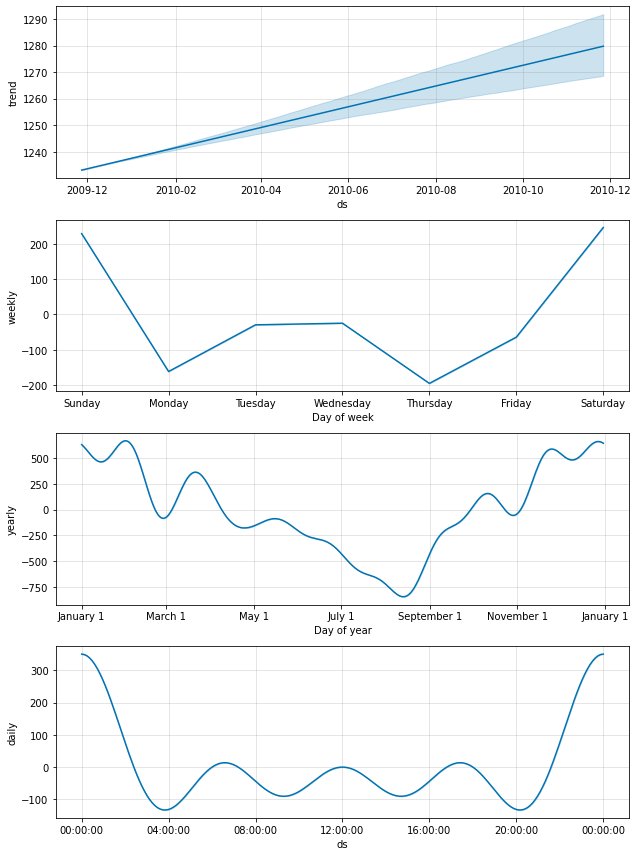

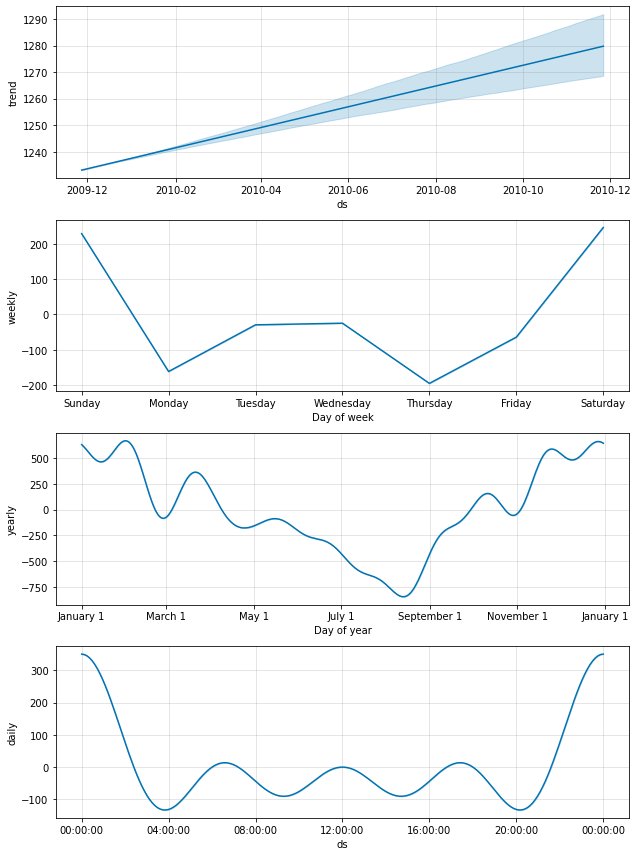

In [29]:
model.plot_components(forecast)

## The Multivariate Solution

In [30]:

data['add1'] = dff['Global_reactive_power']
data['add2'] = dff['Voltage']
data['add3'] = dff['Global_intensity']
data['add4'] = dff['Sub_metering_1']
data['add5'] = dff['Sub_metering_2']
data['add6'] = dff['Sub_metering_3']

In [31]:
#Spliting the dataset
n_tests = 365
df_train = data[:-n_tests]
df_test = data[-n_tests:]

In [32]:
new_model = Prophet(weekly_seasonality=True, daily_seasonality=True)
new_model.add_regressor('add1')
new_model.add_regressor('add2')
new_model.add_regressor('add3')
new_model.add_regressor('add4')
new_model.add_regressor('add5')
new_model.add_regressor('add6')
new_model.fit(df_train);

C:\Users\miky\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [33]:
forecast2 = new_model.predict(df_test)

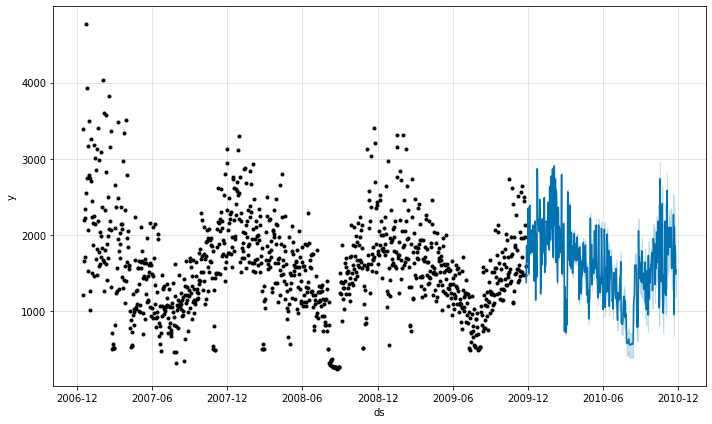

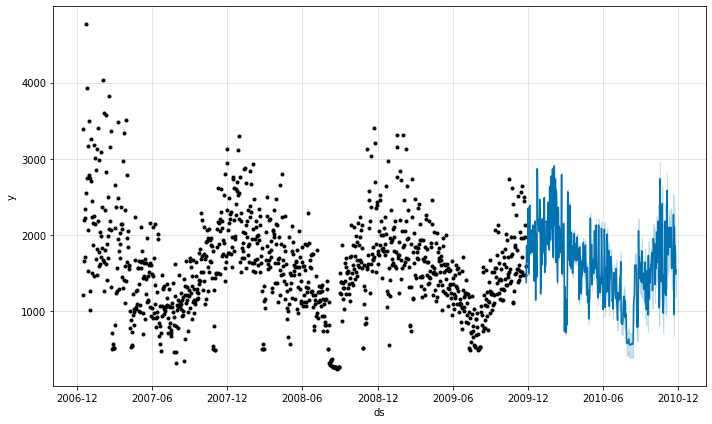

In [34]:
new_model.plot(forecast2)

In [37]:
metric_df = forecast2.set_index('ds')[['yhat']].join(df_test.set_index('ds').y).reset_index()

x1 = metric_df.y
y1 = metric_df.yhat

def mape (x1, y1):
    x1, y1 = np.array(x1), np.array(y1)
    return np.mean(np.abs((x1 - y1) / y1)) *100

print('The MAPE is ', round(mape(x1, y1), 2))

The MAPE is  2.36


In [36]:
rmse_2 = metrics.rmse(metric_df.y, metric_df.yhat)
print('The RMSE is', round(rmse_2, 2))

The RMSE is 36.66


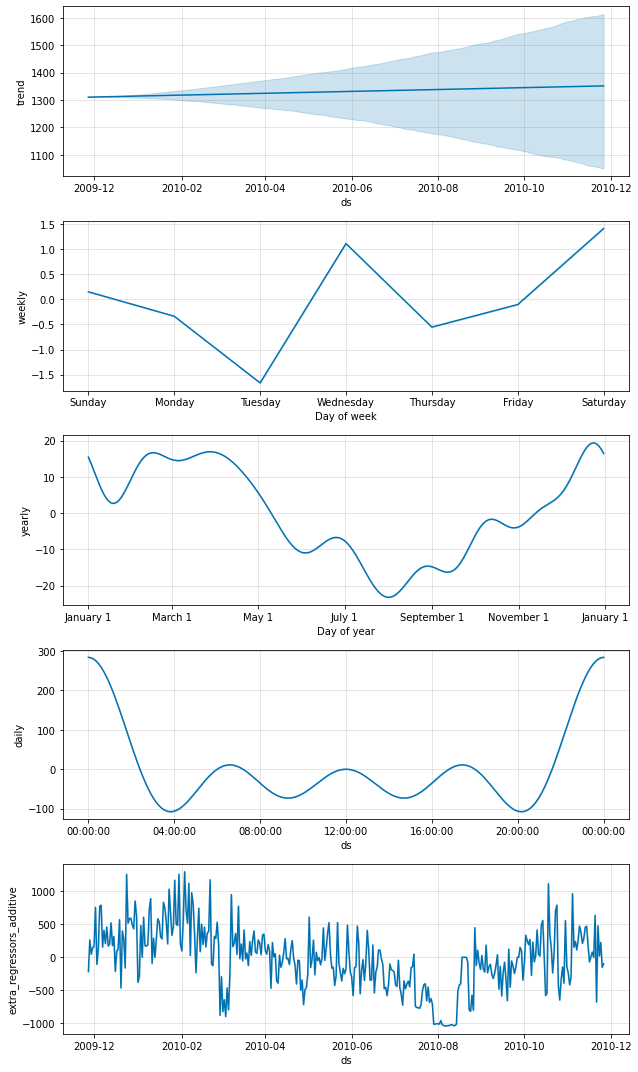

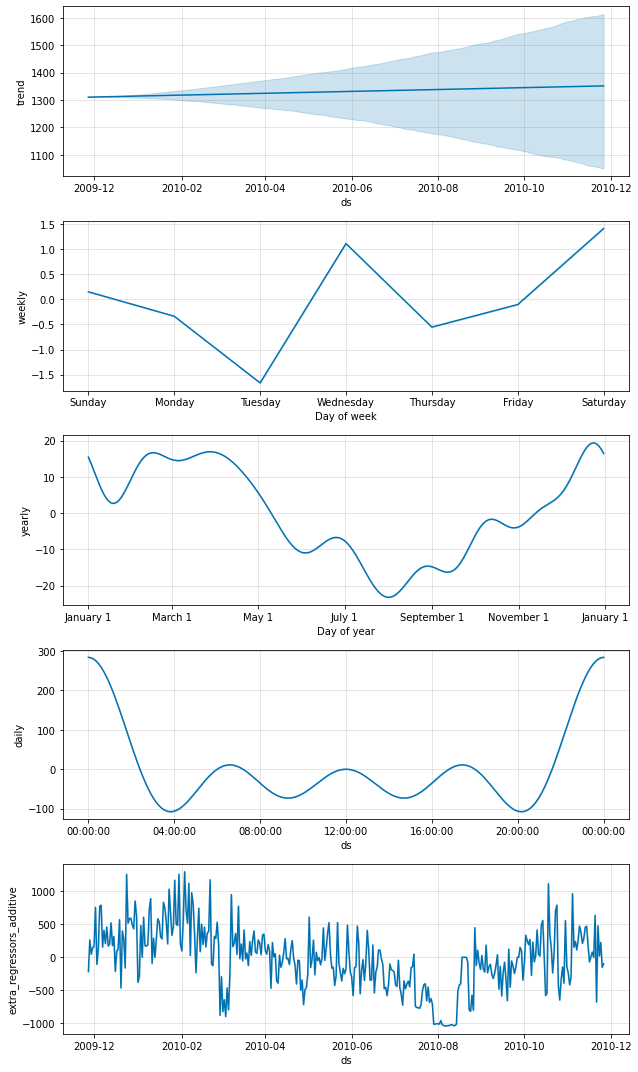

In [38]:
new_model.plot_components(forecast2)